#### <h1><center>CMSC 478: Introduction to Machine Learning</center></h1>

<center><img src="img/title.jpg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Clustering and Gaussian Mixtures</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Agenda</center></h1>

- <b>Clustering</b>
    - K-Means
    - DBSCAN
    - Agglomerative Clustering
    - Clustering for Image Segmentation
    - Clustering for Preprocessing and Semi-Supervised Learning
- <b>Gaussian Mixture Models (GMM)</b>
- <b>Maximum Likelihood Estimation (MLE)</b>
- <b>Bayes' Theorem and Bayesian Models</b>

<h1><center>Unsupervised Learning</center></h1>
<h3><center>Learning from Unlabeled data</center></h3>

*“If intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.”* -**[Yann LeCun](https://engineering.nyu.edu/faculty/yann-lecun)**

<img src="img/yann-lecun.jpg" align="right"/>

<h1><center>Unsupervised Learning Techniques</center></h1>

Here are a few Unsupervised Learning techniques applicable on unlabeled data:

- **Dimensionality Reduction**: Projecting high-dimensional data into spaces with lower dimensionality.

- **Clustering**: Grouping similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

- **Anomaly Detection**: Learning what **normal** data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

- **Density Estimation**: Estimating the Probability Density Function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

<h1><center>Clustering</center></h1>

- The ML task is to group similar instances together into clusters.


- Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an **unsupervised** task.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

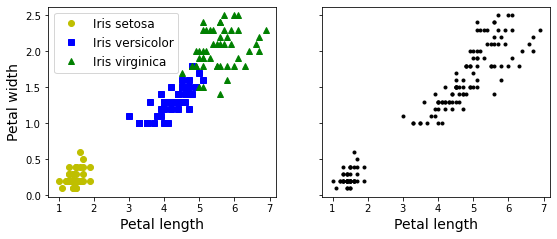

In [3]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

<h1><center>Applications of Clustering</center></h1>

- **Customer Segmentation**
    - You can cluster your customers based on their purchases and their activity on your website. Customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.
    
- **Data Analysis**
    - When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.
    
- **Dimensionalioty Reduction**
    - Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector $\mathbf{x}$ can then be replaced with the vector of its cluster affinities. If there are $k$ clusters, then this vector is $k$-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

<h1><center>Applications of Clustering Cont.</center></h1>

- **Anomaly (Outlier) Detection**
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.
    
- **Semi-supervised Learning**
    - If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

<h1><center>Applications of Clustering Cont.</center></h1>

- **Search Engines**
    - Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster.
    
- **Image Segmentation**
    - By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

<h1><center>Clustering</center></h1>

<center><img src="img/clustering-1.png" align="center"/></center>

<font size='1'>Slide from Ref[4]</font>

<h1><center>Similarity</center></h1>

<center><img src="img/similarity.png" align="center"/></center>

<font size='1'>Slide from Ref[4]</font>

<h1><center>Clustering Approaches</center></h1>

<center><img src="img/clustering-2.png" align="center"/></center>

<font size='1'>Slide from Ref[3]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-1.png" align="center"/></center>

<font size='1'>Slide from Ref[2]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-2.png" align="center"/></center>

<font size='1'>Slide from Ref[2]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-3.png" align="center"/></center>

<font size='1'>Slide from Ref[2]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-4.png" align="center"/></center>

<font size='1'>Slide from Ref[2]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-5.png" align="center"/></center>

<font size='1'>Slide from Ref[2]</font>

<h1><center>K-Means</center></h1>

<center><img src="img/k-means-ex-1.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>K-Means Example</center></h1>

<center><img src="img/k-means-ex-2.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>K-Means Example</center></h1>

<center><img src="img/k-means-ex-3.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>K-Means Example</center></h1>

<center><img src="img/k-means-ex-4.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>K-Means Example</center></h1>

<center><img src="img/k-means-ex-5.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>K-Means Demo</center></h1>

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

<h1><center>K-Means in Scikit-Learn</center></h1>

- The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever. That’s because the mean squared distance between the instances and their closest centroid can only go down at each step.

- The computational complexity of the algorithm is generally linear with regard to the number of instances $m$, the number of clusters $k$, and the number of dimensions n. However, this is only true when the data has a clustering structure.

- If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

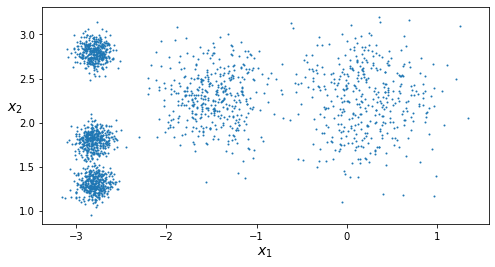

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Each instance was assigned to one of the 5 clusters:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [8]:
# And the following 5 centroids (i.e., cluster centers) were estimated:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

<h1><center>K-Means Labels</center></h1>

- Note that the KMeans instance preserves the labels of the instances it was trained on.

- In this context, the label of an instance is the index of the cluster that instance gets assigned to:

In [11]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

- Of course, we can predict the labels of new instances:

In [12]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

<h1><center>K-Means Decision Boundaries</center></h1>

- Let's plot the model's decision boundaries. This gives us a **Voronoi tessellation** where each centroid is represented with an X:

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

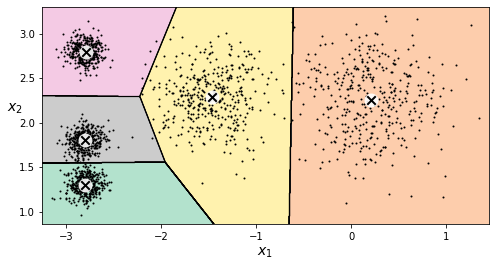

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [16]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

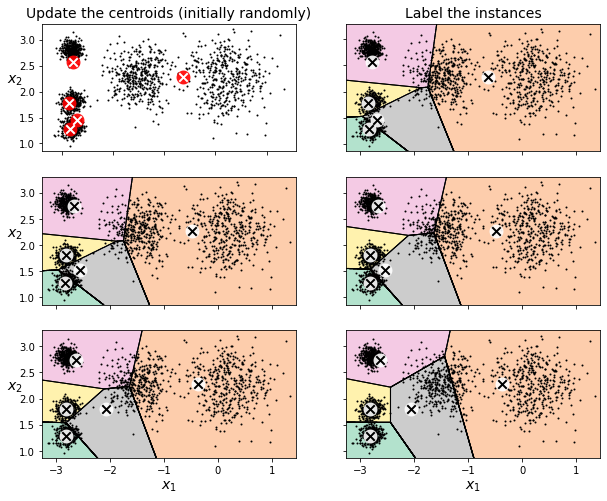

In [17]:
plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

<h1><center>Centroid Initialization</center></h1>

- Although the K-Means algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum).


- Whether K-Means converges to the right solution or not depends on the centroid initialization.

<center><img src="img/centroid.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Centroid Initialization and Performance Metric</center></h1>

- A solution to the issue with centroid initializationis is to run the algorithm multiple times with different random initializations and keep the best solution.


- However, the question would be how exactly we can know which solution is the best.


- That is why a **performance metric** is needed to evaluate clustering models!


- One metric to evaluate clustering model is called the model’s **inertia**, which is the **mean squared distance** between each instance and its closest centroid. The best model is the the model with the lowest **inertia**.

<h1><center>K-Means Model Selection in Scikit-Learn</center></h1>

- The number of random initializations is controlled by the `n_init` hyperparameter: by default, it is equal to 10, which means that the whole K-Means algorithm runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution.

- The `KMeans` class runs the algorithm `n_init` times and keeps the model with the lowest inertia. 

- Model’s inertia is accessible via the `inertia_` instance variable:

In [9]:
kmeans.inertia_

211.5985372581683

- The `score()` method returns the negative inertia. Why negative? Because a predictor’s `score()` method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its `score()` method should return a greater score.

In [10]:
kmeans.score(X)

-211.5985372581683

<h1><center>K-Means ++</center></h1>

- An important improvement to the K-Means algorithm, **K-Means++**, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii.


- They introduced a smarter initialization step that tends to select centroids that are distant from one another.


- This improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution.


- The `KMeans` class of scikit-learn uses this initialization method by default.

<h1><center>Accelerated K-Means and Mini-Batch K-Means</center></h1>

- Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan, called **Accelerated K-Means**. This is the algorithm the `KMeans` class of scikit-learn uses by default.


- **Accelerated K-Means** considerably accelerates the algorithm by avoiding many unnecessary distance calculations.


- Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley, called **Mini-Batch K-Means**. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.


- **Mini-batch K-Means** speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory.


- Scikit-Learn implements this algorithm in the `MiniBatchKMeans` class.

<h1><center>Mini-Batch K-Means vs K-Means</center></h1>


<center><img src="img/mini-batch.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Suboptimal Solutions with Bad Choices of Number of Clusters</center></h1>

<center><img src="img/optimal-number.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Finding the Optimal Number of Clusters</center></h1>

- The inertia is not a good performance metric when trying to choose $k$ because it keeps getting lower as we increase $k$.

- Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

- Let’s plot the inertia as a function of $k$:

(1.0, 8.5, 0.0, 1300.0)

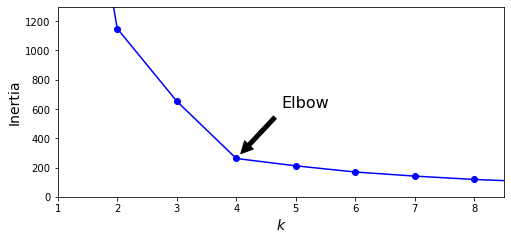

In [12]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction', fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

<h1><center>Silhouette Score</center></h1>

- A precise approach (but also computationally expensive) to find the optimal number of clusters is to use the **silhouette score**, which is the mean **silhouette coefficient** over all the instances.


- An instance’s **silhouette coefficient** is equal to $\frac{(b – a)} {max(a, b)}$ where $a$ is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and $b$ is the mean nearest-cluster distance i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$, excluding the instance’s own cluster.


- The **silhouette coefficient** can vary between –1 and +1.


- A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

<h1><center>Silhouette Score</center></h1>

<center><img src="img/silhouette.svg" align="center"/></center>

<font size='1'>Image from Ref[6]</font>

<h1><center>Silhouette Diagram</center></h1>

- An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.

- This is called a **silhouette diagram**. Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

- The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.

- We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.
<center><img src="img/silhouette-diagram.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>K-Means Limits</center></h1>

- Despite its many merits, most notably being fast and scalable, K-Means is not perfect:

    - It is necessary to run the algorithm several times to avoid suboptimal solutions.
    - You need to specify the number of clusters, which can be quite a hassle.
    - K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes.
    - It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

<h1><center>Image Segmentation</center></h1>

- Image segmentation is the task of partitioning an image into multiple segments.

- In **semantic segmentation**, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians).

- In **instance segmentation**, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian.

- The state of the art in semantic or instance segmentation today is achieved using complex architectures based on **Convolutional Neural Networks** (CNNs).

<center><img src="img/image-segmentation-1.png" align="center"/></center>

<font size='1'>Image from Ref[7]</font>

<h1><center>Image Segmentation</center></h1>

<center><img src="img/image-segmentation-2.png" align="center"/></center>

<font size='1'>Image from Ref[5]</font>

<h1><center>Clustering for Color Segmentation</center></h1>

- Here, we are going to do something much simpler using clustering algorithms: **color segmentation**.

- We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient.

- For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

<center><img src="img/image-segmentation-3.png" align="center"/></center>

<font size='1'>Image from Ref[5]</font>

<h1><center>Color Segmentation Using K-Means in Scikit-Learn</center></h1>

<center><img src="img/image-segmentation-text.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Clustering for Preprocessing and Semi-Supervised Learning</center></h1>

- Clustering can be used as a preprocessing step for dimensionality reduction (from original D to K) before applying a classification method.


- Moreover, for partially labeled data, clustering can be used for **label propagation**, i.e. assigning the same label for all data points in the same cluster.


- This can be used as a **semi-supervised learning** approach on partially or sparsely labeled data, i.e. clustering followed by a supervised learning method like classification.

<h1><center>Clustering for Dimensionality Reduction</center></h1>

- As an example of using clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9.

- First, load the dataset:

In [16]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

- Now let's fit a Logistic Regression model and evaluate it on the test set:

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

- Okay, that's our baseline: 96.89% accuracy.

<h1><center>Improving Classification Accuracy Using K-Means</center></h1>

- Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [19]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

<h1><center>Active Learning</center></h1>

- To improve semi-supervised learning using clustering, the next step could be to do a few rounds of **active learning**, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them.


- There are many different strategies for **active learning**, but one of the most common ones is called **uncertainty sampling**. Here is how it works:
    1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
    2. The instances for which the model is most uncertain (i.e., when its estimated probability is lowest) are given to the expert to be labeled.
    3. You iterate this process until the performance improvement stops being worth the labeling effort.

<h1><center>DBSCAN</center></h1>

- Another popular clustering algorithm that illustrates a very different approach based on local density estimation is **DBSCAN**. This approach allows the algorithm to identify clusters of arbitrary shapes.

- This algorithm defines clusters as continuous regions of high density. Here is how it works:
    - For each instance, the algorithm counts how many instances are located within a small distance **ε** (epsilon) from it. This region is called the instance’s **ε-neighborhood**.
    - If an instance has at least `min_samples` instances in its **ε-neighborhood** (including itself), then it is considered a **core instance**. In other words, **core instances** are those that are located in dense regions.
    - All instances in the neighborhood of a **core instance** belong to the same cluster. This neighborhood may include other **core instances**; therefore, a long sequence of neighboring **core instances** forms a single cluster.
    - Any instance that is not a **core instance** and does not have one in its neighborhood is considered an **anomaly**.
    
    
- **DBSCAN** works well if all the clusters are dense enough and if they are well separated by low-density regions.

<h1><center>DBSCAN</center></h1>

<center><img src="img/dbscan.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>DBSCAN</center></h1>

- DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape.


- It is robust to outliers, and it has just two hyperparameters ( `eps` and `min_samples` ).


- If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly.


- Its computational complexity is roughly $O(m \log m)$, making it pretty close to linear with regard to the number of instances

<h1><center>Hierarchical Clustering - Agglomerative Clustering</center></h1>

<center><img src="img/agglo-1.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Hierarchical Clustering - Agglomerative Clustering</center></h1>

<center><img src="img/agglo-2.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Hierarchical Clustering - Agglomerative Clustering</center></h1>

<center><img src="img/agglo-3.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Gaussian Mixture Model (GMM)</center></h1>

- A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several **Gaussian** distributions whose parameters are unknown.

<center><img src="img/gmm-1.png" align="center"/></center>

<font size='1'>Image from Ref[8]</font>

<h1><center>Gaussian Distribution</center></h1>

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}\frac{||x - \mu||^2}{\sigma^2}}
$$

where $\mu$ is mean and
$\sigma$ is standard deviation, and thus variance is $\sigma^2$.

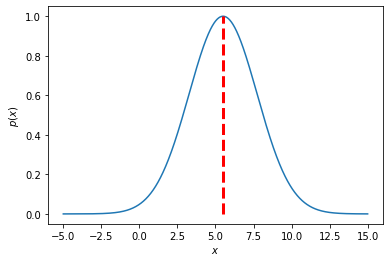

In [12]:
# Gaussian (Normal) Distribution

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(-5,15,1000)
mu = 5.5

plt.plot(xs, np.exp(-0.1 * (xs-mu)**2))
plt.plot([mu, mu], [0, 1], 'r--',lw=3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

<h1><center>Gaussian Distribution</center></h1>

- All the instances generated from a single **Gaussian** distribution form a cluster that typically looks like an **ellipsoid**.

<center><img src="img/ellipsoid.png" align="center"/></center>

<font size='1'>Image from Ref[9]</font>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact
@interact(N=(2,1000), mux=(-10,10,0.1), muy=(-10,10,0.1), sigmax=(0.1,20,0.1), sigmay=(0.1,20,0.1), sigmaxy=(-10,10,0.1))

def bunchOfData(N, mux, muy, sigmax, sigmay, sigmaxy):
    plt.figure(figsize=(8,8))
    xs = np.random.normal(0.0, 1.0, N)
    ys = np.random.normal(0.0, 1.0, N)
    X = np.vstack((xs,ys)).T
    L = np.linalg.cholesky(np.array([[sigmax, sigmaxy],[sigmaxy, sigmay]]))
    newX = np.dot(X,L.T) + [mux,muy]
    plt.plot(newX[:,0], newX[:,1], 'bo', alpha=0.8);
    plt.xlim(-15,15)
    plt.ylim(-15,15);

interactive(children=(IntSlider(value=501, description='N', max=1000, min=2), FloatSlider(value=0.0, descripti…

<h1><center>GMM</center></h1>

- Each cluster in GMM can have a different ellipsoidal shape, size, density, and orientation, just like the following plot.

In [21]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

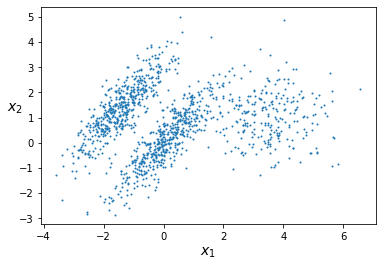

In [22]:
plot_clusters(X)

- When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

<h1><center>GMM Diagram</center></h1>

- Figure 9-16 represents the structure of the conditional dependencies between random variables.

- Here is how to interpret the figure:
    - The circles represent random variables.
    - The squares represent fixed values (i.e., parameters of the model).
    - The large rectangles are called **plates**. They indicate that their content is repeated several times.
    - The number at the bottom right of each plate indicates how many times its content is repeated. So, there are $m$ random variables $z^{(i)}$ from $z^{(1)}$ to $z^{(m)}$ and $m$ random variables $\mathbf{x}^{(i)}$.
    - There are also $k$ means $\mathbf{μ}^{(j)}$ and $k$ covariance matrices $\mathbf{Σ}^{(j)}$.
    - Lastly, there is just one weight vector $\mathbf{φ}$ containing all the weights $φ^{(1)}$ to $φ^{(k)}$.

<center><img src="img/gmm-diagram.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>GMM Diagram Cont.</center></h1>

- Each variable $z (i)$ is drawn from the categorical distribution with weights $\mathbf{φ}$. Each variable $\mathbf{x}^{(i)}$ is drawn from the normal distribution, with the mean and covariance matrix defined by its cluster $z^{(i)}$.

- The solid arrows represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector $\mathbf{φ}$.

- Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitions of that plate. For example, the weight vector $\mathbf{φ}$ conditions the probability distributions of all the random variables $\mathbf{x}^{(1)}$ to $\mathbf{x}^{(m)}$.

- The squiggly arrow from $z^{(i)}$ to $\mathbf{x}^{(i)}$ represents a switch: depending on the value of $z^{(i)}$ , the instance $\mathbf{x}^{(i)}$ will be sampled from a different Gaussian distribution. For example, if $z^{(i)} =j$, then $\mathbf{x}^{(i)} ∼ \mathcal{N} (\mathbf{μ}^{(j)},\mathbf{Σ}^{(j)})$.

- Shaded nodes indicate that the value is known. So, in this case, only the random variables $\mathbf{x}^{(i)}$ have known values: they are called observed variables. The unknown random variables $z^{(i)}$ are called **latent** variables.

<center><img src="img/gmm-diagram.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>GMM in Scikit-Learn</center></h1>

- So, what can you do with such a GMM? Given the dataset X, you typically want to start by estimating the weights $\mathbf{φ}$ and all the distribution parameters $\mathbf{μ}^{(1)}$ to $\mathbf{μ}^{(k)}$ and $\mathbf{Σ}^{(1)}$ to $\mathbf{Σ}^{(k)}$.

- Scikit-Learn’s `GaussianMixture` class makes this super easy:

In [23]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [25]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

- Let's look at the parameters that the EM algorithm estimated:

In [26]:
gm.weights_

array([0.39054348, 0.2093669 , 0.40008962])

In [27]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [28]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

<h1><center>GMM in Scikit-Learn Cont.</center></h1>

- Did the algorithm actually converge?

In [29]:
gm.converged_

True

- How many iterations did it take?

In [30]:
gm.n_iter_

4

- You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [31]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [32]:
gm.predict_proba(X)

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

<h1><center>GMM and Expectation Maximization (EM) Algorithm</center></h1>

- The `GaussianMixture` class relies on the **Expectation-Maximization (EM)** algorithm, which has many similarities with the K-Means algorithm:

    - it also initializes the cluster parameters randomly, then it repeats two steps until convergence,
    - first assigning instances to clusters - this is called the **expectation step**.
    - then updating the clusters - this is called the **maximization step**.

<h1><center>Expectation Maximization (EM) Algorithm</center></h1>

- Expectation Maximization (EM) algorithm attempts estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\sum^{(1)}$ to $\sum^{(k)}$ given the dataset X.
    
    
- In the context of clustering, you can think of **EM** as a generalization of K-Means that not only finds the cluster centers $\mu^{(1)}$ to $\mu^{(k)}$, but also their size, shape, and orientation $\sum^{(1)}$ to $\sum^{(k)}$​, as well as their relative weights $\phi^{(1)}$ to $\phi^{(k)}$.

<h1><center>EM Algorithm Cont.</center></h1>

- Unlike K-Means, EM uses **soft** cluster assignments, not **hard** assignments.


- For each instance, during the **expectation step**, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters).


- Then, during the **maximization step**, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster.


- These probabilities are called the **responsibilities** of the clusters for the instances.


- During the **maximization step**, each cluster’s update will mostly be impacted by the instances it is most **responsible** for.

<h1><center>GMM Example</center></h1>

<center><img src="img/uw-1.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont.</center></h1>

<center><img src="img/uw-2.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont.</center></h1>

<center><img src="img/uw-3.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont.</center></h1>

<center><img src="img/uw-4.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont.</center></h1>

<center><img src="img/uw-5.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont. - 3D Projection</center></h1>

<center><img src="img/uw-7.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM 3D</center></h1>

<center><img src="img/gmm-3d.gif" align="center"/></center>

<font size='1'>Image from Ref[11]</font>

<h1><center>Gaussian 3D to 2D Projection</center></h1>

<center><img src="img/gmm-3d-2d.png" align="center"/></center>

<font size='1'>Image from Ref[12]</font>

<h1><center>GMM Example Cont. - Prior Probability</center></h1>

<center><img src="img/uw-8-1.png" align="center"/></center>

<center><img src="img/uw-8-2.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>GMM Example Cont. - Likelihood</center></h1>

<center><img src="img/uw-9-1.png" align="center"/></center>

<center><img src="img/uw-9-2.png" align="center"/></center>

<font size='1'>Image from Ref[10]</font>

<h1><center>Probability vs Likelihood</center></h1>

- The terms “probability” and “likelihood” are often used interchangeably in the English language, but they have very different meanings in statistics.


- Given a statistical model with some parameters θ, the word **probability** is used to describe how plausible a future outcome x is (knowing the parameter values θ), while the word **likelihood** is used to describe how plausible a particular set of parameter values θ are, after the outcome x is known.

<h1><center>Likelihood Function</center></h1>

- Consider a 1D mixture model of two Gaussian distributions centered at –4 and +1.
- For simplicity, this toy model has a single parameter θ that controls the standard deviations of both distributions. The top-left contour plot in Figure 9-20 shows the entire model f(x; θ) as a function of both x and θ.

- To estimate the probability distribution of a future outcome x, you need to set the model parameter θ. For example, if you set θ to 1.3 (the horizontal line), you get the probability density function f(x; θ=1.3) shown in the lower-left plot.

- Say you want to estimate the probability that x will fall between –2 and +2. You must calculate the integral of the PDF on this range (i.e., the surface of the shaded region).

- But what if you don’t know θ, and instead if you have observed a single instance x=2.5 (the vertical line in the upper-left plot)? In this case, you get the likelihood function $L(θ|x=2.5)=f(x=2.5; θ)$, represented in the upper-right plot.

<center><img src="img/likelihood-function.png" align="center"/></center>

<font size='1'>Equation from Ref[1]</font>

<h1><center>Maximum Likelihood Estimation (MLE)</center></h1>

- Given a dataset X, a common task is to try to estimate the most likely values for the model parameters.


- To do this, you must find the values that maximize the **likelihood function**, given X.


- In the example shown in the previous slide, if you have observed a single instance x=2.5, the **Maximum Likelihood Estimate (MLE)** of θ is θ =1.5


- If a prior probability distribution g over θ exists, it is possible to take it into account by maximizing L(θ|x)g(θ) rather than just maximizing L(θ|x). This is called **Maximum A-Posteriori (MAP)** estimation.


- Since MAP constrains the parameter values, you can think of it as a regularized version of MLE.

<h1><center>Bayes Theorem</center></h1>

<center><img src="img/bayes.png" align="center"/></center>

<font size='1'>Equation from Ref[1]</font>

<h1><center>BIC and AIC</center></h1>

- With K-Means, you could use the **inertia** or the **silhouette score** to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes.

- Instead, you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC).

- In these equations:
    - $m$ is the number of instances, as always.
    - $p$ is the number of parameters learned by the model.
    - $L$ is the maximized value of the likelihood function of the model.


<center><img src="img/bic.png" align="center"/></center>

<font size='1'>Equation from Ref[1]</font>

<h1><center>Choosing K with BIC and AIC</center></h1>

- We can use BIC and AIC to choose an aptimal number of clusters.

- Figure 9-21 shows the BIC for different numbers of clusters k.

- As you can see, both the BIC and the AIC are lowest when k=3, so it is most likely the best choice.

<center><img src="img/fig-19-21.png" align="center"/></center>

<font size='1'>Equation from Ref[1]</font>

<h1><center>Bayesian GMM in Scikit-Learn</center></h1>

- Rather than manually searching for the optimal number of clusters, you can use the `BayesianGaussianMixture` class, which is capable of giving weights equal (or close) to zero to unnecessary clusters.


- Set the number of clusters `n_components` to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically.

<h1><center>Next Topic: Neural Networks and Deep Learning</center></h1>

<h1><center>References</center></h1>

[1] Hands-On ML Textbook Edition-2 2019

[2] Clustering [Slides from UIowa](http://user.engineering.uiowa.edu/~ie_155/Lecture/K-means.pdf)

[3] Clustering [Slides from MIT](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)

[4] Clustering [Slides from CMU](https://www.cs.cmu.edu/~epxing/Class/10701/slides/clustering.pdf)

[5] Clustering [David Sontag's Slides from NYU](http://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture14.pdf) Slides adapted from Luke Zettlemoyer, Vibhav Gogate, Carlos Guestrin, Andrew Moore, Dan Klein

[6] [Silhouette Loss Function Metric](https://platform.ai/blog/page/11/the-silhouette-loss-function-metric-learning-with-a-cluster-validity-index/)

[7] https://towardsdatascience.com/image-segmentation-on-apache-spark-46164dd53c73

[8] https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

[9] https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/

[10] [Machine Learning Specialization at Coursera - University of Washington](https://www.coursera.org/specializations/machine-learning)

[11] https://stackoverflow.com/questions/26019584/understanding-concept-of-gaussian-mixture-models

[12] https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/